In [9]:
import pandas as pd
import numpy as np

In [10]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [11]:
!wget $data

--2023-02-03 08:53:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... ..........  3%  250K 6s
    50K .......... .......... .......... .......... ..........  6%  243K 5s
   100K .......... .......... .......... .......... .......... 10%  345K 5s
   150K .......... .......... .......... .......... .......... 13%  872K 4s
   200K .......... .......... .......... .......... .......... 17% 1.27M 3s
   250K .......... .......... .......... .......... .......... 20% 1.62M 3s
   300K .......... .......... .......... .......... .......... 24%  831K 2s
   350K ..

In [133]:
df=pd.read_csv('data.csv')

In [134]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [135]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [165]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [166]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [167]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [168]:
for col in df.columns:
    print (col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot: xlabel='msrp', ylabel='Count'>

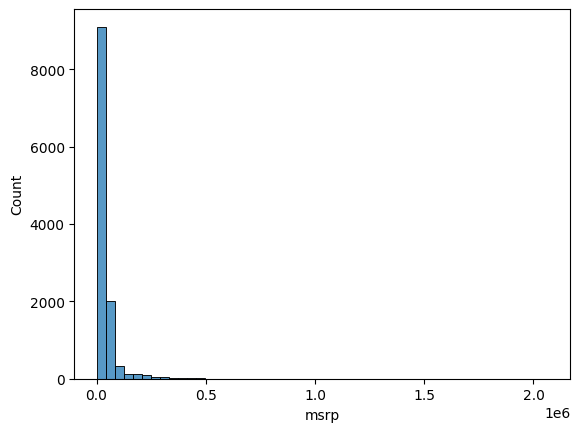

In [170]:
sns.histplot(df.msrp, bins=50)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

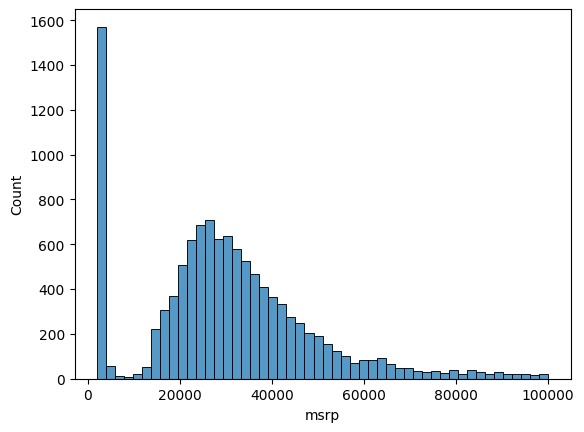

In [171]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [172]:
msrp_logs = np.log1p(df.msrp)
msrp_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot: xlabel='msrp', ylabel='Count'>

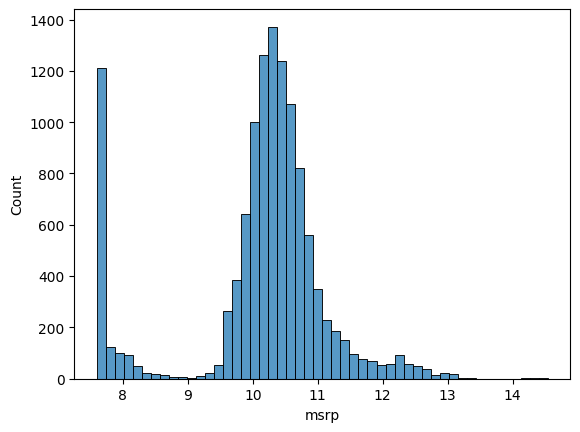

In [173]:
sns.histplot(msrp_logs, bins=50)

In [174]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [175]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_pred-n_test
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [176]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [177]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [178]:
idx = np.arange(n)

In [179]:
np.random.seed(1)
np.random.shuffle(idx)

In [180]:
idx[:n_train]
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [181]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4257,lotus,evora_400,2017,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,39,21,613,91900
11151,aston_martin,v8_vantage,2014,premium_unleaded_(required),420.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,136900
5262,hyundai,genesis,2015,regular_unleaded,311.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,29,18,1439,38000
8965,suzuki,samurai,1993,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,convertible_suv,26,24,481,2000
7380,mitsubishi,outlander,2015,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,29,24,436,26195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10751,chevrolet,traverse,2016,regular_unleaded,281.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,22,15,1385,36505
655,bmw,6_series,2016,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,31,20,3916,77300
570,fiat,500l,2015,premium_unleaded_(recommended),160.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,33,25,819,19345
9815,kia,sorento,2015,regular_unleaded,290.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,25,18,1720,36700


In [182]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [183]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [184]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [185]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [189]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [187]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [356]:
base = ['engine_hp','engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [244]:
X_train = df_train[base].values

In [203]:
X_train = df_train[base].fillna(0).values

In [210]:
X_train

array([[ 400.,    6.,   39.,   21.,  613.],
       [ 420.,    8.,   21.,   14.,  259.],
       [ 311.,    6.,   29.,   18., 1439.],
       ...,
       [ 160.,    4.,   33.,   25.,  819.],
       [ 290.,    6.,   25.,   18., 1720.],
       [ 170.,    4.,   34.,   25.,  873.]])

In [209]:
XTX = X_train.T.dot(X_train)
XTX

array([[5.30650932e+08, 1.10801530e+07, 4.45098930e+07, 3.21153030e+07,
        2.78777044e+09],
       [1.10801530e+07, 2.47855000e+05, 1.00116000e+06, 7.26061000e+05,
        6.27304180e+07],
       [4.45098930e+07, 1.00116000e+06, 5.52374000e+06, 4.20180000e+06,
        2.92605434e+08],
       [3.21153030e+07, 7.26061000e+05, 4.20180000e+06, 3.28520800e+06,
        2.17921696e+08],
       [2.78777044e+09, 6.27304180e+07, 2.92605434e+08, 2.17921696e+08,
        3.19715863e+10]])

In [214]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.85484284e-08, -1.26929417e-06, -4.16117055e-08,
         5.35297983e-08,  1.71213204e-11],
       [-1.26929417e-06,  7.70750922e-05, -7.23028443e-06,
         5.33340060e-06, -1.07312530e-08],
       [-4.16117055e-08, -7.23028443e-06,  1.12697482e-05,
        -1.23193300e-05, -1.35675579e-09],
       [ 5.35297983e-08,  5.33340060e-06, -1.23193300e-05,
         1.43899227e-05, -4.68187365e-10],
       [ 1.71213204e-11, -1.07312530e-08, -1.35675579e-09,
        -4.68187365e-10,  6.64486259e-11]])

In [218]:
w_full = XTX_inv.dot(X_train.T).dot(y_train)

In [224]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., ..., 1., 1., 1.])

In [229]:
X = np.column_stack([ones, X])

In [230]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [232]:
w0, w = train_linear_regression(X_train, y_train)

In [358]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot: ylabel='Count'>

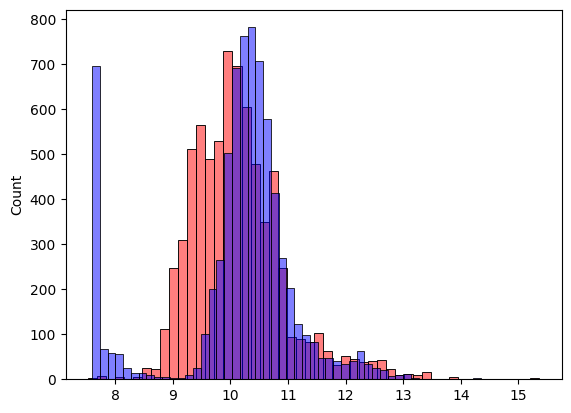

In [359]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',  alpha=0.5, bins=50)

In [360]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [361]:
rmse(y_train, y_pred)

0.7359636946676676

In [ ]:
base = ['engine_hp','engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [362]:
def prepare_X(df):
    df_num = df[base]
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [363]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7626591881557756

In [248]:
df['year'].max()

2017

In [267]:
2017 - df_train.year

0        0
1        3
2        2
3       24
4        2
        ..
7145     1
7146     1
7147     2
7148     2
7149     1
Name: year, Length: 7150, dtype: int64

In [367]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [368]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5237475530174468

<AxesSubplot: ylabel='Count'>

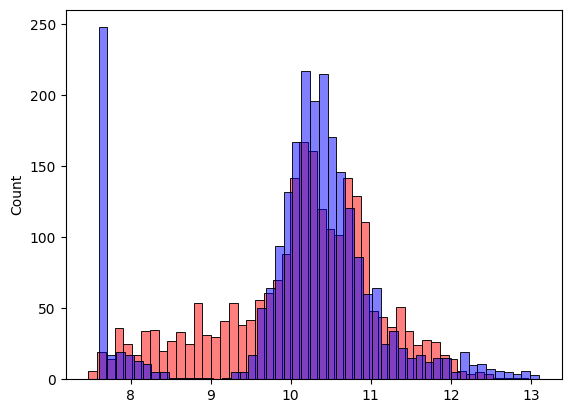

In [369]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue',  alpha=0.5, bins=50)

In [370]:
for v in [2,3,4]:
    (df_train['number_of_doors_%s' %v])=(df_train.number_of_doors==v).astype(int)

In [373]:
def prepare_X(df):
    df = df.copy()
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        (df['number_of_doors_%s' %v])=(df.number_of_doors==v).astype(int)
        features.append('number_of_doors_%s' %v)
    
    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [374]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5214746782928528

In [375]:
makes=list(df.make.value_counts().head().index)

In [398]:
def prepare_X(df):
    df = df.copy()
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        (df['number_of_doors_%s' %v])=(df.number_of_doors==v).astype(int)
        features.append('number_of_doors_%s' %v)
    
    for v in makes:
        (df['make_%s' %v])=(df.make==v).astype(int)
        features.append('make_%s' %v)
    
    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [399]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5113039241984358

In [400]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
number_of_doors_2      int32
number_of_doors_3      int32
number_of_doors_4      int32
dtype: object

In [401]:
categorical_variables =['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
             'market_category', 'vehicle_size', 'vehicle_style']

In [402]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [403]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [404]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [420]:
def prepare_X(df):
    df = df.copy()
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        (df['number_of_doors_%s' %v])=(df.number_of_doors==v).astype(int)
        features.append('number_of_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            (df['%s_%s' %(c, v)])=(df[c]==v).astype(int)
            features.append('%s_%s' %(c, v))
    
    df_num = df[features]
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [427]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

248.58743467141662

In [428]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [430]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4633142162577173

In [432]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 2529492246855107.5 248.58743467141662
1e-05 10.804019888598342 0.4633176994545057
0.0001 6.786307417181118 0.4633176584675925
0.001 6.83092394090535 0.463317118720183
0.01 6.800482698217857 0.4633142162577173
0.1 6.544610238293281 0.463461936825895
1 5.566362791735024 0.4668070684812325
10 4.175531934163494 0.48522373919166223


In [447]:
r=0.01
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.463317118720183

In [448]:
df_full_train = pd.concat([df_train, df_val])

In [449]:
df_full_train = df_full_train.reset_index(drop=True)

In [450]:
X_full_train = prepare_X(df_full_train)

In [451]:
X_full_train

array([[400.,   6.,  39., ...,   1.,   0.,   0.],
       [420.,   8.,  21., ...,   0.,   1.,   0.],
       [311.,   6.,  29., ...,   0.,   0.,   0.],
       ...,
       [140.,   4.,  31., ...,   1.,   0.,   0.],
       [241.,   4.,  32., ...,   0.,   0.,   0.],
       [185.,   4.,  34., ...,   0.,   0.,   0.]])

In [457]:
y_full_train = np.concatenate([y_train, y_val])

In [458]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

In [459]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.5194050332439736

In [462]:
car=df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'prius_c',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 99.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'hatchback,hybrid',
 'vehicle_size': 'compact',
 'vehicle_style': '4dr_hatchback',
 'highway_mpg': 46,
 'city_mpg': 53,
 'popularity': 2031}

In [464]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,prius_c,2016,regular_unleaded,99.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,46,53,2031


In [466]:
X_small=prepare_X(df_small)

In [469]:
y_pred = w0 + X_small.dot(w)

y_pred = y_pred[0]
y_pred

9.874817517407239

In [470]:
np.expm1(y_pred)

19433.741013265608

In [471]:
np.expm1(y_test[20])

19559.999999999993